In [1]:
import librosa
import numpy as np
from os import path
import matplotlib.pyplot as plt
from librosa.feature import melspectrogram
from librosa.display import specshow
from librosa.effects import *
import IPython.display as ipd

%matplotlib inline

In [2]:
!ls ~/wavs; pwd

00326aa9.wav 007759c4.wav 00ae03f6.wav 010a0b3a.wav
0038a046.wav 008afd93.wav 00eac343.wav 01a5a2a3.wav
/Users/aagnone/Downloads/audio-sigproc-playground


In [3]:
x, sr = librosa.load(path.join('data', '01a5a2a3.wav'))
sr

22050

In [19]:
def plot_audio(x, sr):
    specshow(
        librosa.power_to_db(melspectrogram(x, sr)),
        x_axis='time',
        y_axis='mel'
    )

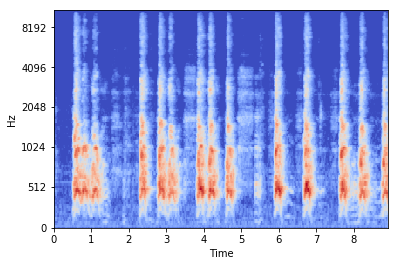

In [21]:
plot_audio(x, sr)
ipd.Audio(x, rate=sr)

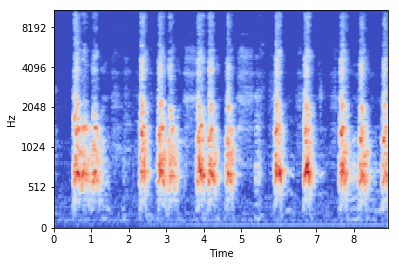

In [23]:
x_shift = pitch_shift(x, sr, n_steps=6)
plot_audio(x_shift, sr)
ipd.Audio(x_shift, rate=sr)

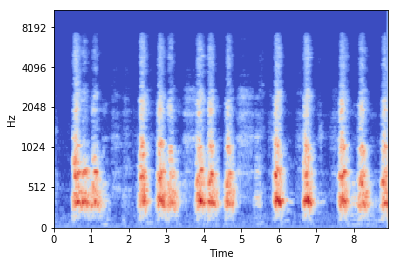

In [24]:
x_shift = pitch_shift(x, sr, n_steps=-6)
plot_audio(x_shift, sr)
ipd.Audio(x_shift, rate=sr)

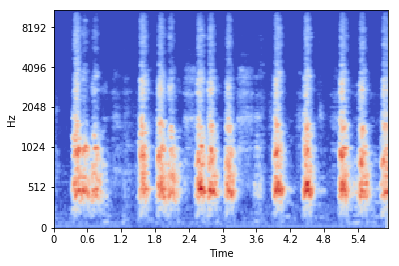

In [25]:
x_aug = time_stretch(x, 1.5)
plot_audio(
    x_aug,
    sr
)
ipd.Audio(x_aug, rate=sr)

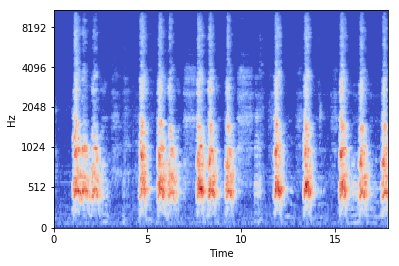

In [26]:
x_aug = time_stretch(x, 0.5)
plot_audio(
    x_aug,
    sr
)
ipd.Audio(x_aug, rate=sr)

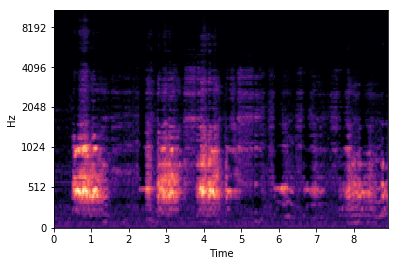

In [27]:
x_aug = harmonic(x)
plot_audio(
    x_aug,
    sr
)
ipd.Audio(x_aug, rate=sr)

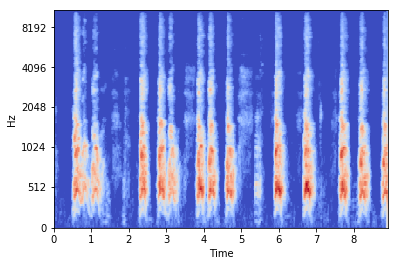

In [28]:
x_aug = percussive(x)
plot_audio(
    x_aug,
    sr
)
ipd.Audio(x_aug, rate=sr)

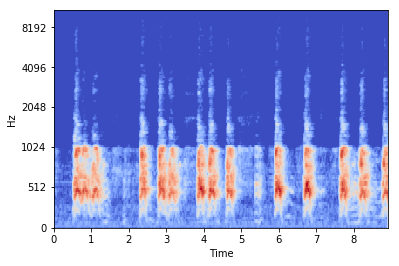

In [48]:
from scipy.signal import remez, freqz, lfilter


def lpf(wc, n_taps=256, tw_factor=1/16.0, fs=44100):
    tw = wc * tw_factor
    band_edges = [0, wc, wc + tw, fs * 0.5]
    return remez(n_taps, band_edges, [1, 0], fs=fs)

filter_taps = lpf(1000, fs=sr)
x_aug = lfilter(filter_taps, [1], x)

plot_audio(
    x_aug,
    sr
)
ipd.Audio(x_aug, rate=sr)